# Fitting Gaussians to Data

$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\piv}{\mathbf{\pi}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$

## Fitting a Gaussian (Normal) Distribution to Data Samples

Now for the fun part.  How do we adjust the mean and covariance matrix
to fit a set of samples?
We will do so by defining the likelihood of a set of data for a given
model with particular parameter values, and derive
the procedure to maximize the likelihood by searching for the best
parameter values.

Given a set of samples $\Xv =\{\xv_1, \xv_2, \ldots, \xv_N\}$ and
particular values for parameters $\mu$ and $\Sigma$, the likelihood of the data
is the joint probability over all samples.  If we assume them to be independent of each other, then this is a product of the likelihoods for each sample:
$$
L(\Xv;\muv,\Sigmav) = \prod_{n=1}^N \Norm(\xv_n|\muv,\Sigmav)
$$
where $\Norm(\xv_n|\muv,\Sigmav)$ is the value of the Normal
distribution function for sample $\xv_n$.  We want

$$
\begin{align*}
\muv, \Sigmav &= \argmax{\muv,\Sigmav} L(\Xv;\muv,\Sigmav)\\
\end{align*}
$$

How do we find this?  Take derivatives and set equal to zero?  But,
taking the derivative of a product of a lot of things gives me a headache.
Instead, let's work with the logarithm of the likelihood.  Recall that the logarithm of a product is a sum of the logarithms.  Turns out that the values of $\muv$ and $\Sigmav$ that maximize $L(\Xv ; \piv,\muv, \Sigmav)$ also maximize the logarithm of  $L(\Xv ; \muv, \Sigmav)$.
The argmax of
the log of the likelihood will give us the same result as the argmax
of the likelihood.

Which logarithm base should we use?  10?  2?  In applying the logarithm, we often have to apply it to many of the terms in our expression.  Since our expression involves powers of $e$, let's use natural logarithms, $\ln$. The log liklihood becomes

$$
\begin{align*}
LL(\Xv;\muv,\Sigmav) &= \ln \prod_{n=1}^N \Norm(\xv_n|\muv,\Sigmav)\\
&= \sum_{n=1}^N \ln \Norm(\xv_n|\muv,\Sigmav)\\
& = \sum_{n=1}^N \ln \frac{1}{2\pi^{D/2} |\Sigmav |^{1/2}}
      e^{-\frac{1}{2} (\xv_n-\muv)^T \Sigmav^{-1} (\xv_n - \muv)}
\end{align*}
$$
where $D$ is the dimensionality of each sample.

Now what?
Using your immense memory of logarithms, we get
$$
\begin{align*}
LL(\Xv;\muv,\Sigmav) &= -\sum_{n=1}^N \left ( \frac{D}{2} \ln(2\pi) +
\frac{1}{2} \ln |\Sigmav | +\frac{1}{2} (\xv_n-\muv)^T \Sigmav^{-1} (\xv_n - \muv) \right )
\end{align*}
$$

Let's simplify this to one-dimensional, or scalar, data samples for now, so $\Sigmav = \sigma$ and $\muv
= \mu$.
$$
\begin{align*}
LL(x;\mu,\sigma) &= -\sum_{n=1}^N \left ( \frac{D}{2} \ln(2\pi) +
\frac{1}{2} \ln \sigma +\frac{1}{2} (x_n-\mu)^2 / \sigma \right )\\
\frac{\partial LL(x;\mu,\sigma)}{\partial \mu} &= -\sum_{n=1}^N 
\left ( \frac{1}{2} 2 (x_n-\mu)(-1) / \sigma \right ) \\
 &= \sum_{n=1}^N (x_n-\mu) / \sigma \\
\end{align*}
$$
Setting this equal to zero results in
$$
\begin{align*}
0 &= \sum_{n=1}^N (x_n-\mu)(-1) / \sigma \\
&=  \sum_{n=1}^N x_n- \sum_{n=1}^N \mu \\
&=  \sum_{n=1}^N x_n- N \mu \\
\mu &= \frac{1}{N} \sum_{n=1}^N x_n \\
\end{align*}
$$
and
$$
\begin{align*}
\frac{\partial LL(x;\mu,\sigma)}{\partial \sigma} &= -\sum_{n=1}^N 
\left ( \frac{1}{2}\frac{1}{\sigma} +
\frac{1}{2} (x_n-\mu)^2 (-1) \sigma^{-2} \right )\\
 &= \frac{1}{2}\sum_{n=1}^N \left ( -\frac{1}{\sigma} + (x_n-\mu)^2
 / \sigma^2 \right ) \\
 &= \frac{1}{2}\sum_{n=1}^N \frac{-\sigma + (x_n-\mu)^2}{\sigma^2}
\end{align*}
$$
Setting this equal to zero results in
$$
\begin{align*}
0  &= \frac{1}{2}\sum_{n=1}^N \frac{-\sigma + (x_n-\mu)^2}{\sigma^2}\\
 &= \sum_{n=1}^N -\sigma + (x_n-\mu)^2\\
 &=  -N\sigma + \sum_{n=1}^N (x_n-\mu)^2\\
\sigma &= \frac{1}{N} \sum_{n=1}^N (x_n-\mu)^2
\end{align*}
$$
There we have the standard formulas for the mean and variance of a
normal distribution.  ($\sigma$ usually means standard deviation and
$\sigma^2$ is used for variance.)

Of course for more than one dimension we get a $D$-dimensional vector
for $\muv$ and a $D\times D$ matrix for the covariance.


Now, let's do it in python.

Let's generate some data.  First, a little review.

We can convert samples, $x$, from a univariate Normal distribution to
samples, $z$, from a standard Normal distribution by 
$$
\begin{align*}
z = \frac{x-\mu}{\sigma}
\end{align*}
$$
We can generate samples, $x$, from samples $z$ from a standard Normal distribution.
$$
\begin{align*}
x = z \sigma + \mu
\end{align*}
$$
This is extended to multivariate Gaussians as
$$
\begin{align*}
\zv & = (\xv-\muv)^T\Sigmav^{-1/2}\\
\xv &= \zv \boldsymbol{L} + \muv
\end{align*}
$$
where $\boldsymbol{L}\boldsymbol{L}^T = \Sigmav$, found by Cholesky
factorization. (See [documentation on *np.linalg.cholesky*](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.cholesky.html)).

So, to generate two-dimensional samples from an arbitrary Normal
distribution, first make samples $\zv$, from a standard Normal distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def normald(X, mu, sigma):
    """ normald:
       X contains samples, one per row, N x D. 
       mu is mean vector, D x 1.
       sigma is covariance matrix, D x D.  """
    D = X.shape[1]
    detSigma = sigma if D == 1 else np.linalg.det(sigma)
    if detSigma == 0:
        raise np.linalg.LinAlgError('normald(): Singular covariance matrix')
    sigmaI = 1.0/sigma if D == 1 else np.linalg.inv(sigma)
    normConstant = 1.0 / np.sqrt((2*np.pi)**D * detSigma)
    diffv = X - mu.T # change column vector mu to be row vector
    return normConstant * np.exp(-0.5 * np.sum(np.dot(diffv, sigmaI) * diffv, axis=1))[:,np.newaxis]

In [7]:
nSamples = 50000
xs = np.random.normal(0.0, 1.0, nSamples)
ys = np.random.normal(0.0, 1.0, nSamples)
X = np.vstack((xs,ys)).T
X.shape

(50000, 2)

Now transform to samples $\xv$ from a Normal distribution with $\muv$
and $\Sigmav$.  This can also be done by calling [*np.random.multivariate_normal*](http://docs.scipy.org/doc/numpy/reference/routines.random.html).

In [8]:
Sigma = np.array([[1, 0.5], [0.5,0.4]])
Sigma

array([[ 1. ,  0.5],
       [ 0.5,  0.4]])

In [9]:
mu = np.array([5,8])
mu

array([5, 8])

In [11]:
L = np.linalg.cholesky(Sigma)
print(L)
newX = np.dot(X,L.T) + mu
newX

[[ 1.          0.        ]
 [ 0.5         0.38729833]]


array([[ 3.07631141,  7.02017366],
       [ 6.1115908 ,  7.69538234],
       [ 3.2416658 ,  7.37064157],
       ..., 
       [ 4.97705419,  7.5543859 ],
       [ 5.15873836,  7.71334368],
       [ 4.18305994,  7.78805492]])

Let's plot both the original samples, in red, and the transformed samples, in blue.

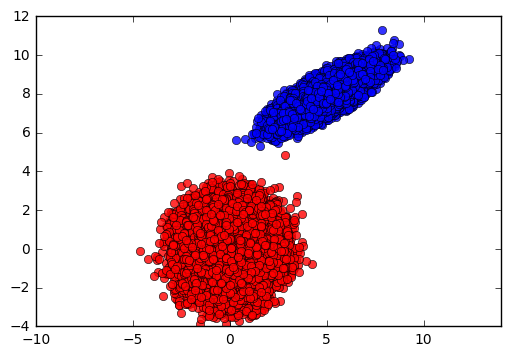

In [12]:
plt.plot(   X[:,0],    X[:,1], 'ro', alpha=0.8)
plt.plot(newX[:,0], newX[:,1], 'bo', alpha=0.8);
plt.axis('equal');

Now, because we always check our calculations, we calculate
the parameters that maximize the likelihood of the data.

In [13]:
nSamples = newX.shape[0]
muEst = np.sum(newX,axis=0) / nSamples
diff = newX - muEst
vars = np.sum(diff * diff, axis=0) / (nSamples-1)
covar = np.sum(diff[:,0] * diff[:,1]) / (nSamples-1)
SigmaEst = np.array([[vars[0], covar], [covar, vars[1]]])
# or 
#  muEst = np.mean(newX,axis=0)
#  SigmaEst = np.cov(newX.T)

print("Original mean")
print(mu)
print("Estimated mean")
print(muEst)
print("Original Sigma")
print(Sigma)
print("Estimated Sigma")
print(SigmaEst)

Original mean
[5 8]
Estimated mean
[ 4.99048876  7.99493285]
Original Sigma
[[ 1.   0.5]
 [ 0.5  0.4]]
Estimated Sigma
[[ 1.01053685  0.50632343]
 [ 0.50632343  0.40384108]]


Let's use the [ipython notebook *interact* feature](http://nbviewer.ipython.org/github/ipython/ipython-in-depth/blob/master/examples/Interactive%20Widgets/Using%20Interact.ipynb) to explore the spread of normally distributed points as the mean and covariance matrix are varied.  As you move the sliders you may encounter output with a line near the bottom that says

    LinAlgError: Matrix is not positive definite
    
You have just selected values for the covariance matrix, $\Sigma$, for which the matrix cannot be factored into $L L^T$. We must have positive definite matrices for valid covariance matrices.  Given a set of data, the sample covariance matrix will not satisfy this if at least one column is a linear function of one or more other columns.  For the following interaction, just move the slider back to where it was until a matrix is selected that does not produce the error.

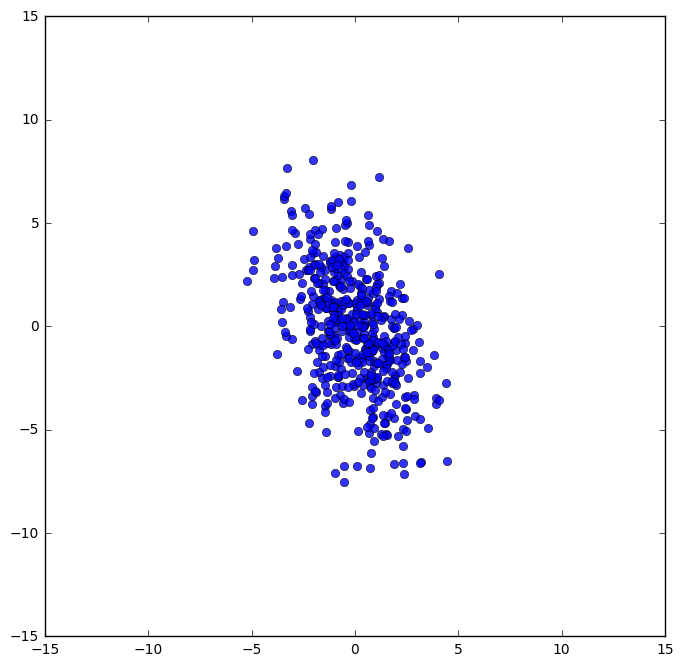

In [14]:
from ipywidgets import interact
@interact(N=(2,1000), mux=(-10,10,0.1), muy=(-10,10,0.1), sigmax=(0.1,20,0.1), sigmay=(0.1,20,0.1), sigmaxy=(-10,10,0.1))

def bunchOfData(N, mux, muy, sigmax, sigmay, sigmaxy):
    plt.figure(figsize=(8,8))
    xs = np.random.normal(0.0, 1.0, N)
    ys = np.random.normal(0.0, 1.0, N)
    X = np.vstack((xs,ys)).T
    L = np.linalg.cholesky(np.array([[sigmax, sigmaxy],[sigmaxy, sigmay]]))
    newX = np.dot(X,L.T) + [mux,muy]
    plt.plot(newX[:,0], newX[:,1], 'bo', alpha=0.8);
    plt.xlim(-15,15)
    plt.ylim(-15,15);
